In [1]:
import sys
sys.path.append('../')

import numpy as np
import hydra

from src.util.setup import create_learner, create_setting, get_config
from src.util.metrics import variational_stability

In [2]:
# specify setting (from config file)
path_config = "configs/"
setting = "single_item"
learn_alg = "frank_wolfe"
experiment = "fpsb"

cfg, cfg_learner = get_config(path_config, setting, experiment, learn_alg)

In [3]:
# create learner and setting
learner = create_learner(cfg_learner)
mechanism, game, strategies = create_setting(setting, cfg)
if not mechanism.own_gradient:
    game.get_utility(mechanism)

# initialize strategies
for i in game.set_bidder:
    strategies[i].initialize(cfg_learner.init_method)

In [4]:
# run learner
learner.run(mechanism, game, strategies)

 30%|██████              | 301/1.00k [00:00<00:00, 1.17kit/s]

Convergence after 301 iterations
Relative utility loss 0.01 %


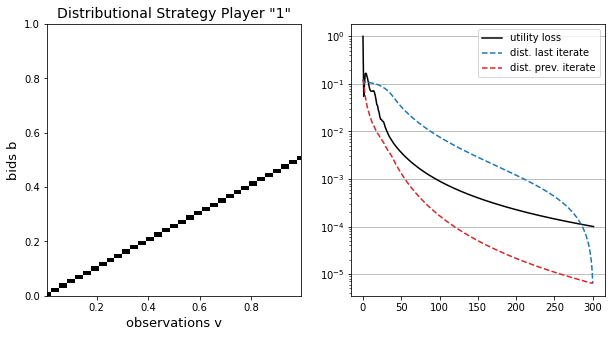

In [5]:
# computed strategy
strategies['1'].plot(more=True)

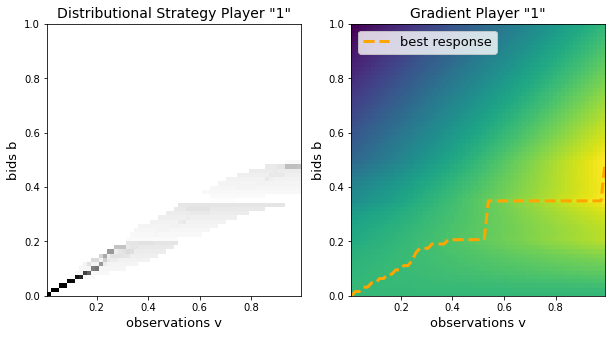

In [6]:
# strategy and gradient after 10 iterations
iter = 10
strategies['1'].plot(grad=True, iter=iter)